In [47]:
import matplotlib.pyplot as plt
import matplotlib.patches as mplpatches
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import numpy as np
import sys
import time
from collections import defaultdict
sys.path.insert(0, '/private/groups/brookslab/gabai/tools/seqUtils/src/')
from seqUtil import *
from nanoUtil import *
from bamUtil import *
from nntUtil import *
from plotUtil import *

In [121]:
outpath = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/'
sigalign = '/private/ groups/brookslab/gabai/projects/Add-seq/data/chrom/eventalign/231112_test_chrII_sig.tsv'
prediction = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/231114_n100_chrII_0_prediction.tsv'
bam = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/mapping/chrom.sorted.bam'
genome = '/private/groups/brookslab/gabai/projects/Add-seq/data/ref/sacCer3.fa'
chrII_evt = '/data/scratch/gabai/addseq_data/eventalign/chrII.eventalign.txt'
gtfFile = '/private/groups/brookslab/gabai/projects/Add-seq/data/ref/Saccharomyces_cerevisiae.R64-1-1.109.gtf'
bdgFile = '/private/groups/brookslab/gabai/projects/Add-seq/data/ref/sacCer3.bedgraph'
test_region = 'chrII:13244-23635'
predbdg = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/231115_test_plot_chrII_0.6_prediction.bedgraph'

In [94]:
region = myprediction.region
bins = myprediction.bins
step = 40
signalWindow = 400
kmerWindow = 75
threshold = 0.6

In [143]:
def plotbdgTrack(plot, bdg, region, step = 1, scale = 1000, header = False, col = 'grey', annot = ''):
    
    chrom = region.split(':')[0]
    locus = region.split(':')[1].split('-')
    pstart, pend = int(locus[0]), int(locus[1])
    ymax = 0
    
    with open(bdg, 'r') as bdgFh:
        if header:
            header = bdgFh.readlines(1)
        for line in bdgFh:
            line = line.strip().split('\t')
            if line[0] != chrom:
                continue
            start = int(line[1])
            end =  int(line[2])
            if end < pstart:
                continue
            elif start > pend:
                break
            else:
                prob = float(line[3])
                height = min(1.0, prob/scale)
                if height > ymax:
                    ymax = height
                left = max(start, pstart)
                rectangle = mplpatches.Rectangle([left, 0], end-left, height,
                        facecolor = col,
                        edgecolor = 'grey',
                        linewidth = 0)
                plot.add_patch(rectangle)
    
    plot.set_xlim(pstart, pend)
    plot.set_ylim(0,ymax+0.1)
    plot.tick_params(bottom=False, labelbottom=False,
                   left=False, labelleft=False,
                   right=False, labelright=False,
                   top=False, labeltop=False)
    plot.set_ylabel(annot)

In [123]:
test_region = 'chrII:13244-23635'

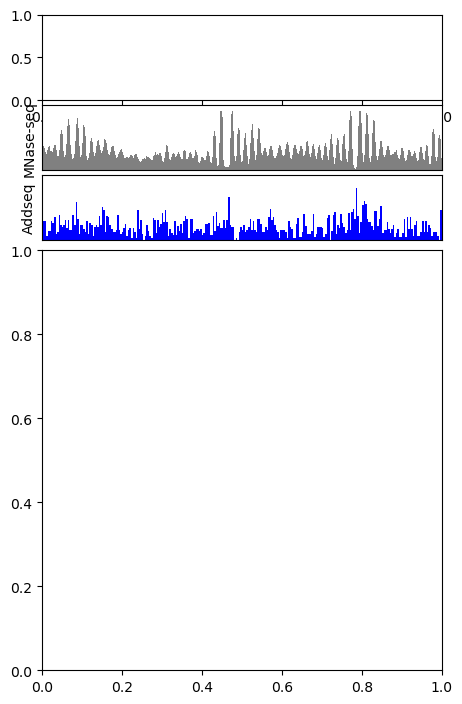

In [145]:
figureWidth=5
figureHeight=7
panelWidth=4
panelHeight=1.5
plt.figure(figsize=(figureWidth,figureHeight))
figureHeight = figureHeight/2
panel0 = plt.axes([0.5/figureWidth, 3.05/figureHeight, panelWidth/figureWidth, panelHeight/3.5/figureHeight])
panel1 = plt.axes([0.5/figureWidth, 2.7/figureHeight, panelWidth/figureWidth, panelHeight/4.6/figureHeight])
panel2 = plt.axes([0.5/figureWidth, 2.35/figureHeight, panelWidth/figureWidth, panelHeight/4.6/figureHeight])
panel3 = plt.axes([0.5/figureWidth, 0.2/figureHeight, panelWidth/figureWidth, panelHeight*1.4/figureHeight])
plotbdgTrack(panel1, bdgFile, test_region, col = 'grey', header = False, annot = 'MNase-seq')
plotbdgTrack(panel2, predbdg, test_region, step = 40, scale=1, col = 'b', header = True, annot = 'Addseq')

In [147]:
4548-1350

3198